In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("./users.csv")  # Update with actual file path

# Sample 2,000 users
df_sample = df.sample(n=2000, random_state=42).reset_index(drop=True)

# One-Hot Encode categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df_sample[["Country", "AgeGroup"]])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out())

# Add UserID for reference
encoded_df["UserID"] = df_sample["UserID"]


   UserID      Country AgeGroup  HDBSCAN_Cluster
0   75722  Switzerland    55-64                6
1   80185        China    35-44              115
2   19865      Romania    65-74               15
3   76700       Mexico    55-64               72
4   92992      Germany    45-54               96
5   76435       France    35-44               74
6   84005        Japan    55-64               78
7   80918        Italy    55-64               81
8   60768        Nepal    45-54                5
9   50075     Pakistan    35-44               37
HDBSCAN_Cluster
-1      271
 116     55
 117     48
 107     44
 119     43
       ... 
 47       6
 48       6
 54       6
 60       6
 39       5
Name: count, Length: 121, dtype: int64


C:\Users\raulb\AppData\Local\Temp\ipykernel_21016\1097644151.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_sample["HDBSCAN_Cluster"], palette="magma")


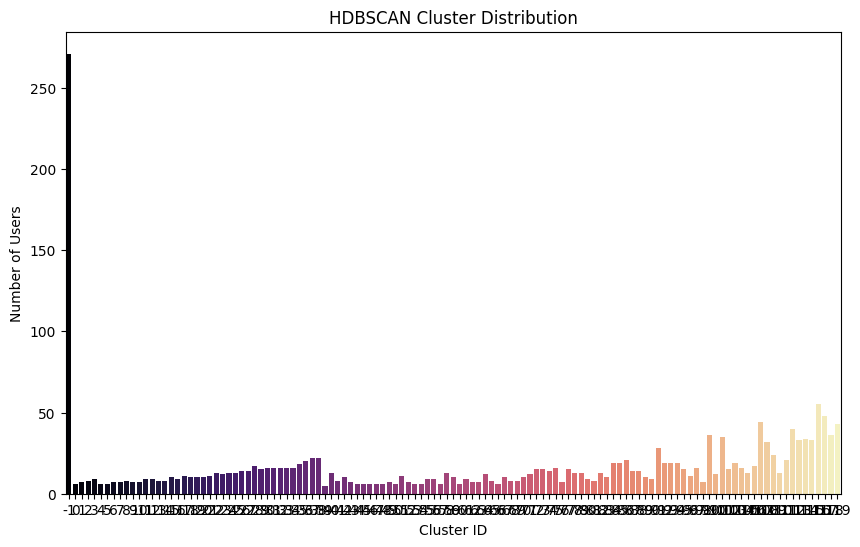

In [10]:
import hdbscan
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_distances

# Scale the one-hot encoded data
scaled_data = StandardScaler().fit_transform(encoded_features.toarray())

# Compute cosine distance matrix
cosine_distance_matrix = cosine_distances(scaled_data)  # Use scaled data

# HDBSCAN doesn't natively support "cosine" on raw feature vectors,
# but you can manually compute the cosine distance matrix and use metric='precomputed'.
# Train HDBSCAN
# Apply HDBSCAN with precomputed distance
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric="precomputed", cluster_selection_method="eom")
df_sample["HDBSCAN_Cluster"] = hdbscan_clusterer.fit_predict(cosine_distance_matrix)

# Show sample results
print(df_sample[["UserID", "Country", "AgeGroup", "HDBSCAN_Cluster"]].head(10))

# Count number of users in each cluster
print(df_sample["HDBSCAN_Cluster"].value_counts())

# Plot cluster distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=df_sample["HDBSCAN_Cluster"], palette="magma")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Users")
plt.title("HDBSCAN Cluster Distribution")
plt.show()


In [19]:
chosen_cluster = 26

# Filter users belonging to the chosen cluster
cluster_users = df_sample[df_sample["HDBSCAN_Cluster"] == chosen_cluster]

# Display a random sample of 5 users from this cluster
print(cluster_users[["UserID", "Country", "AgeGroup"]].sample(n=10, random_state=42, replace=True))


      UserID      Country AgeGroup
1146   13774  South Korea    65-74
713    67484  South Korea    65-74
1861   54409  South Korea    45-54
1853   37638  South Korea    35-44
1397   59391  South Korea    25-34
1861   54409  South Korea    45-54
772    19213  South Korea    55-64
1146   13774  South Korea    65-74
1630   48601  South Korea    35-44
690    27806  South Korea    25-34
